In [1]:
from utils import read_graph_from_json, update_attributes, get_k_L_U
filepath = 'C:\\districting-data-2020\\'
district_types = ['CD','SS','SH']

from number_of_districts import states as all_states
states = all_states.copy()
states.remove('HI')
print(states)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


In [2]:
from main import get_max_whole_UBs
results = dict()

for state in states:

    # read graph
    filename = state + '_county.json'
    G = read_graph_from_json( filepath + filename )
    update_attributes(G, state)
    
    for district_type in district_types:

        (k, L, U) = get_k_L_U(G, state, district_type)
        if k <= 1:
            print(f"Skipping {state} {district_type} because k = {k}.")
            continue

        results[state, district_type] = get_max_whole_UBs(G, L, U, k, verbose=False)    

Starting AK with k = 1 and deviation = 0.01
Thus, we have L = 729725 and U = 737057
Skipping AK CD because k = 1.
Starting AK with k = 20 and deviation = 0.1
Thus, we have L = 34837 and U = 38503
Set parameter Username
Academic license - for non-commercial use only - expires 2026-04-01
Adding non-dominated constraints:
{'02090'}
{'02170'}
{'02122'}
{'02020'}
Time to generate initial inequalities: 1.71 seconds.
Adding non-dominated constraints:
{'02090'}
{'02170'}
{'02122'}
{'02020'}
Time to generate initial inequalities: 1.74 seconds.
Adding non-dominated constraints:
{'02090'}
{'02170'}
{'02122'}
{'02020'}
Time to generate initial inequalities: 1.53 seconds.
Adding non-dominated constraints:
{'02090'}
{'02170'}
{'02122'}
{'02020'}
Time to generate initial inequalities: 1.28 seconds.
Starting AK with k = 40 and deviation = 0.1
Thus, we have L = 17419 and U = 19251
Adding non-dominated constraints:
{'02020'}
{'02090'}
{'02170'}
{'02110'}
{'02130', '02198', '02195', '02275'}
{'02122'}
Ti

In [3]:
print("results =", results)

results = {('AK', 'SS'): {'k': 20, 'L': 34837, 'U': 38503, '|C|': 30, 'm': 55, 'trivial_UB': 26, 'vicinity_constraints': [{'02090'}, {'02170'}, {'02122'}, {'02020'}], 'vicinity_UB': 26, 'generalized_vicinity_constraints': [{'02090'}, {'02170'}, {'02122'}, {'02020'}], 'generalized_vicinity_UB': 26, 'articulation_constraints': [{'02090'}, {'02170'}, {'02122'}, {'02020'}], 'articulation_UB': 26, 'generalized_articulation_constraints': [{'02090'}, {'02170'}, {'02122'}, {'02020'}], 'generalized_articulation_UB': 26}, ('AK', 'SH'): {'k': 40, 'L': 17419, 'U': 19251, '|C|': 30, 'm': 55, 'trivial_UB': 25, 'vicinity_constraints': [{'02020'}, {'02090'}, {'02170'}, {'02110'}, {'02130', '02198', '02195', '02275'}, {'02122'}], 'vicinity_UB': 24, 'generalized_vicinity_constraints': [{'02020'}, {'02090'}, {'02170'}, {'02110'}, {'02130', '02198', '02195', '02275'}, {'02122'}], 'generalized_vicinity_UB': 24, 'articulation_constraints': [{'02020'}, {'02090'}, {'02170'}, {'02110'}, {'02130', '02198', '021

In [4]:
for district_type in district_types:
    print("Results for", district_type)
    for state in states:
        if (state, district_type) in results.keys():
            print(state, '&', end=' ')
            print(results[state, district_type]['|C|'], "&", end=' ')
            print(results[state, district_type]['k'], "&", end=' ')
            print(results[state, district_type]['L'], "&", end=' ')
            print(results[state, district_type]['U'], "&", end=' ')
            print(results[state, district_type]['trivial_UB'], "&", end=' ')
            print(results[state, district_type]['vicinity_UB'], "&", end=' ')
            print(results[state, district_type]['generalized_vicinity_UB'], "&", end=' ')
            print(results[state, district_type]['articulation_UB'], "&", end=' ')
            print(results[state, district_type]['generalized_articulation_UB'], "\\\\")
    print("")

Results for CD
AL & 67 & 7 & 714166 & 721342 & 67 & 67 & 67 & 67 & 67 \\
AR & 75 & 4 & 749117 & 756645 & 75 & 75 & 75 & 75 & 75 \\
AZ & 15 & 9 & 790639 & 798584 & 13 & 13 & 13 & 13 & 13 \\
CA & 58 & 52 & 756549 & 764152 & 43 & 43 & 43 & 43 & 43 \\
CO & 64 & 8 & 718106 & 725322 & 63 & 62 & 62 & 62 & 62 \\
CT & 8 & 5 & 717583 & 724794 & 5 & 5 & 5 & 5 & 5 \\
FL & 67 & 28 & 765375 & 773067 & 60 & 58 & 58 & 58 & 58 \\
GA & 159 & 14 & 761311 & 768961 & 157 & 157 & 157 & 157 & 157 \\
IA & 99 & 4 & 793605 & 801580 & 99 & 99 & 99 & 99 & 99 \\
ID & 44 & 2 & 914956 & 924150 & 44 & 44 & 44 & 44 & 44 \\
IL & 102 & 17 & 749909 & 757445 & 100 & 100 & 100 & 100 & 100 \\
IN & 92 & 9 & 750178 & 757717 & 91 & 91 & 91 & 91 & 91 \\
KS & 105 & 4 & 730798 & 738142 & 105 & 105 & 105 & 105 & 105 \\
KY & 120 & 6 & 747218 & 754727 & 119 & 119 & 119 & 119 & 119 \\
LA & 64 & 6 & 772412 & 780174 & 64 & 64 & 64 & 64 & 64 \\
MA & 14 & 9 & 777197 & 785007 & 10 & 9 & 9 & 9 & 9 \\
MD & 24 & 8 & 768293 & 776013 & 21 & 21

In [5]:
for district_type in district_types:
    print("Results for", district_type)
    for state in states:
        if (state, district_type) in results.keys():
            
            print(state, '&', end=' ')
            print(results[state, district_type]['|C|'], "&", end=' ')
            print(results[state, district_type]['k'], "&", end=' ')
            print(results[state, district_type]['L'], "&", end=' ')
            print(results[state, district_type]['U'], "&", end=' ')

            ub1 = results[state, district_type]['trivial_UB']
            ub2 = results[state, district_type]['vicinity_UB']
            ub3 = results[state, district_type]['generalized_vicinity_UB']
            ub4 = results[state, district_type]['articulation_UB']
            ub5 = results[state, district_type]['generalized_articulation_UB']

            ubs = [ub1, ub2, ub3, ub4, ub5]
            cheap_ub_index = 1 + min( i for i in range(5) if ubs[i] == ub5 )
            
            if cheap_ub_index == 1:
                print(f"\\textbf{ {ub1} } &", end=' ')
            else:
                print(ub1, "&", end=' ')
            
            if cheap_ub_index == 2:
                print(f"\\textbf{ {ub2} } &", end=' ')
            else:
                print(ub2, "&", end=' ')
                
            if cheap_ub_index == 3:
                print(f"\\textbf{ {ub3} } &", end=' ')
            else:
                print(ub3, "&", end=' ')

            if cheap_ub_index == 4:
                print(f"\\textbf{ {ub4} } &", end=' ')
            else:
                print(ub4, "&", end=' ')

            if cheap_ub_index == 5:
                print(f"\\textbf{ {ub5} } &  \\\\")
            else:
                print(ub5, "&  \\\\")
                
    print("")

Results for CD
AL & 67 & 7 & 714166 & 721342 & \textbf{67} & 67 & 67 & 67 & 67 &  \\
AR & 75 & 4 & 749117 & 756645 & \textbf{75} & 75 & 75 & 75 & 75 &  \\
AZ & 15 & 9 & 790639 & 798584 & \textbf{13} & 13 & 13 & 13 & 13 &  \\
CA & 58 & 52 & 756549 & 764152 & \textbf{43} & 43 & 43 & 43 & 43 &  \\
CO & 64 & 8 & 718106 & 725322 & 63 & \textbf{62} & 62 & 62 & 62 &  \\
CT & 8 & 5 & 717583 & 724794 & \textbf{5} & 5 & 5 & 5 & 5 &  \\
FL & 67 & 28 & 765375 & 773067 & 60 & \textbf{58} & 58 & 58 & 58 &  \\
GA & 159 & 14 & 761311 & 768961 & \textbf{157} & 157 & 157 & 157 & 157 &  \\
IA & 99 & 4 & 793605 & 801580 & \textbf{99} & 99 & 99 & 99 & 99 &  \\
ID & 44 & 2 & 914956 & 924150 & \textbf{44} & 44 & 44 & 44 & 44 &  \\
IL & 102 & 17 & 749909 & 757445 & \textbf{100} & 100 & 100 & 100 & 100 &  \\
IN & 92 & 9 & 750178 & 757717 & \textbf{91} & 91 & 91 & 91 & 91 &  \\
KS & 105 & 4 & 730798 & 738142 & \textbf{105} & 105 & 105 & 105 & 105 &  \\
KY & 120 & 6 & 747218 & 754727 & \textbf{119} & 119 & 119 &

In [6]:
# Define a color palette (list of color hex codes or names)
color_palette = [
    #"#FF5733",  # Red-Orange
    "#3357FF",  # Blue
    "#F1C40F",  # Yellow
    "#9B59B6",  # Purple
    "#1ABC9C",  # Teal
    "#E67E22",  # Orange
    #"#2ECC71",  # Green
    #"#3498DB",  # Sky Blue
    "#E74C3C",   # Red
    "#33FF57"  # Lime Green
]

In [7]:
# ad-hoc inequality for GA/SH says must split one of:
# Brooks 13027
# Colquitt 13071
# Cook 13075
# Grady 13131
# Mitchell 13205
# Thomas 13275
# Tift 13277
# Worth 13321
state = 'GA'
district_type = 'SH'
results[state, district_type]['generalized_articulation_constraints'].append({'13027', '13071', '13075', '13131', '13205', '13275', '13277', '13321'})

from main import remove_supersets
results[state, district_type]['generalized_articulation_constraints'] = remove_supersets( results[state, district_type]['generalized_articulation_constraints'] )

Starting AK with k = 1 and deviation = 0.01
Thus, we have L = 729725 and U = 737057
Skipping AK CD because k = 1.
Starting AK with k = 20 and deviation = 0.1
Thus, we have L = 34837 and U = 38503
Starting AK with k = 40 and deviation = 0.1
Thus, we have L = 17419 and U = 19251
Starting AL with k = 7 and deviation = 0.01
Thus, we have L = 714166 and U = 721342
Starting AL with k = 35 and deviation = 0.1
Thus, we have L = 136374 and U = 150728
Starting AL with k = 105 and deviation = 0.1
Thus, we have L = 45458 and U = 50242
Starting AR with k = 4 and deviation = 0.01
Thus, we have L = 749117 and U = 756645
Starting AR with k = 35 and deviation = 0.1
Thus, we have L = 81742 and U = 90345
Starting AR with k = 100 and deviation = 0.1
Thus, we have L = 28610 and U = 31621
Starting AZ with k = 9 and deviation = 0.01
Thus, we have L = 790639 and U = 798584
Starting AZ with k = 30 and deviation = 0.1
Thus, we have L = 226465 and U = 250302
Starting AZ with k = 30 and deviation = 0.1
Thus, we h

C:\Users\buchanan\AppData\Local\anaconda3\Lib\site-packages\geopandas\plotting.py:673: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)


Starting DE with k = 41 and deviation = 0.1
Thus, we have L = 22938 and U = 25352
Starting FL with k = 28 and deviation = 0.01
Thus, we have L = 765375 and U = 773067
Starting FL with k = 40 and deviation = 0.1
Thus, we have L = 511532 and U = 565377
Starting FL with k = 120 and deviation = 0.1
Thus, we have L = 170511 and U = 188459
Starting GA with k = 14 and deviation = 0.01
Thus, we have L = 761311 and U = 768961
Starting GA with k = 56 and deviation = 0.1
Thus, we have L = 181720 and U = 200848
Starting GA with k = 180 and deviation = 0.1
Thus, we have L = 56536 and U = 62486
Starting IA with k = 4 and deviation = 0.01
Thus, we have L = 793605 and U = 801580
Starting IA with k = 50 and deviation = 0.1
Thus, we have L = 60618 and U = 66997
Starting IA with k = 100 and deviation = 0.1
Thus, we have L = 30309 and U = 33498
Starting ID with k = 2 and deviation = 0.01
Thus, we have L = 914956 and U = 924150
Starting ID with k = 35 and deviation = 0.1
Thus, we have L = 49919 and U = 551

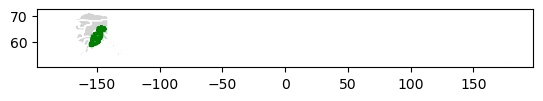

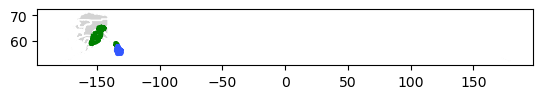

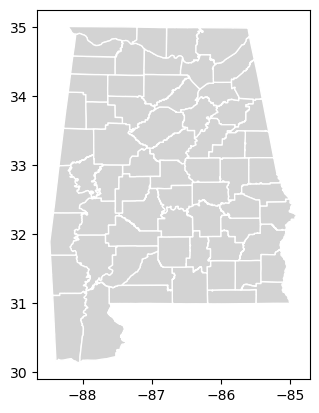

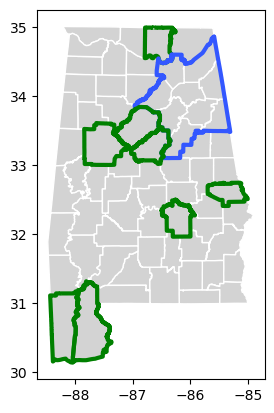

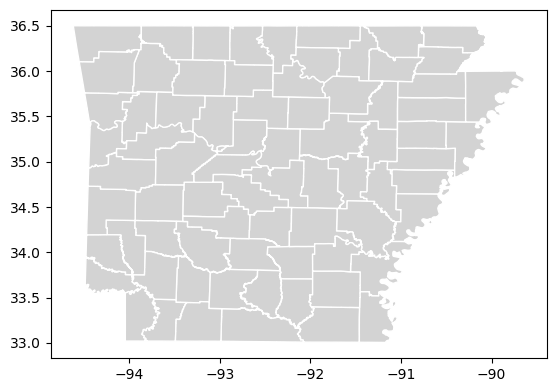

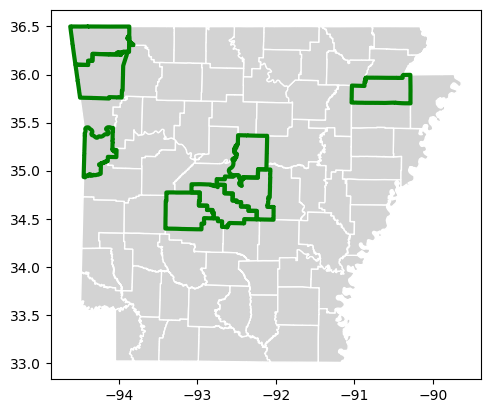

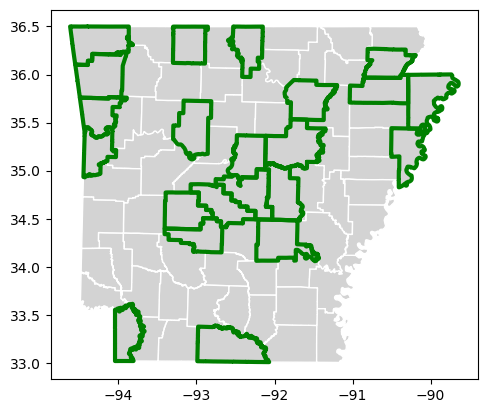

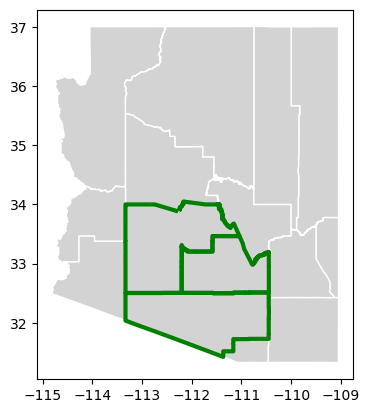

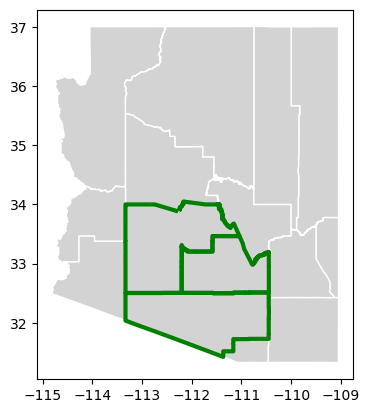

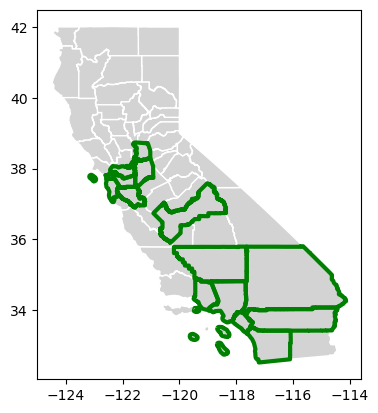

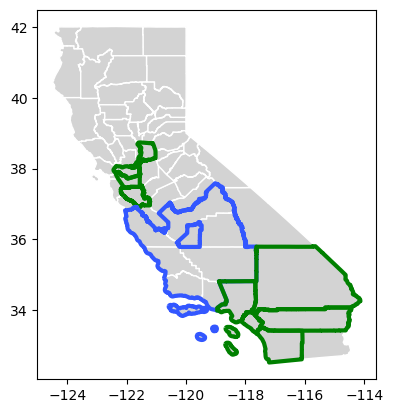

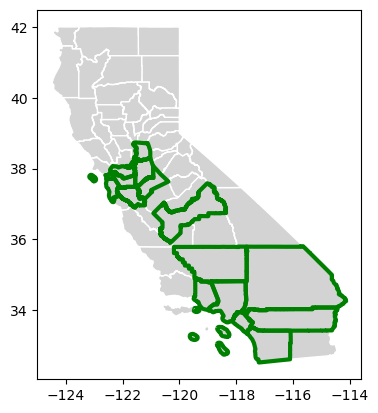

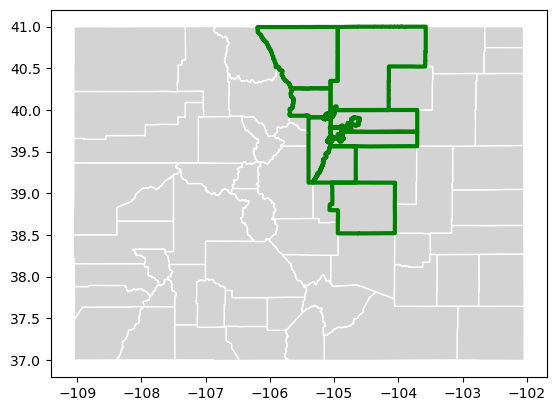

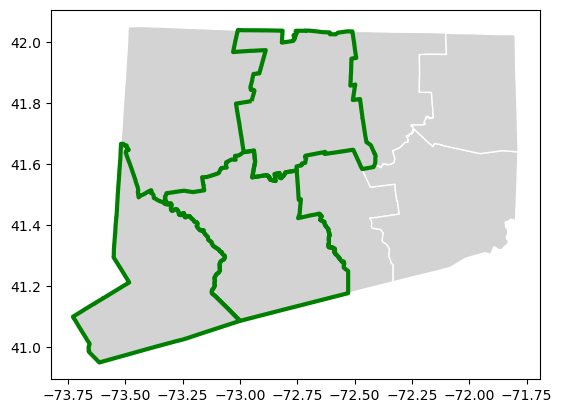

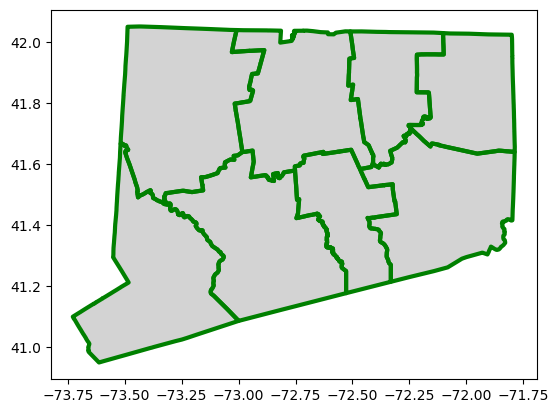

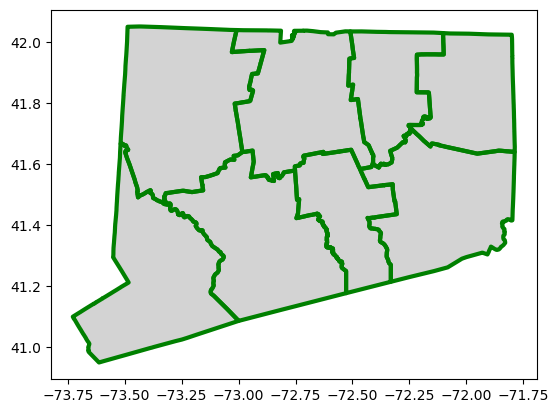

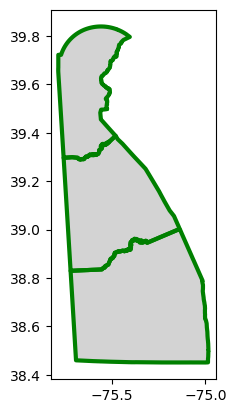

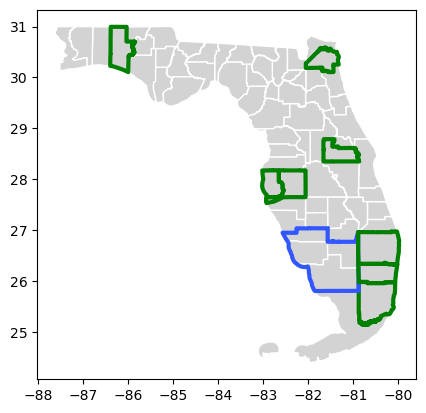

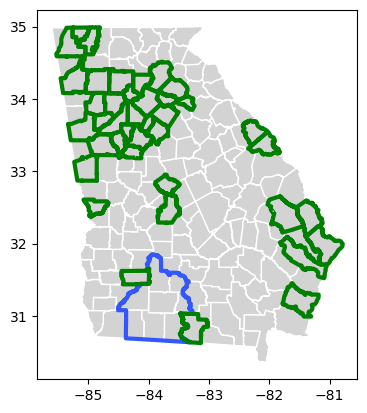

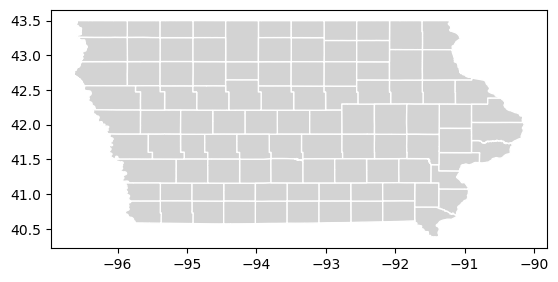

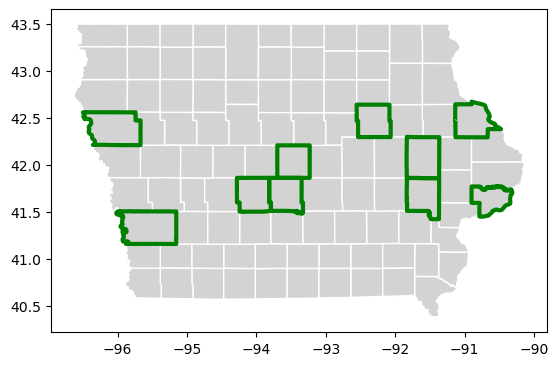

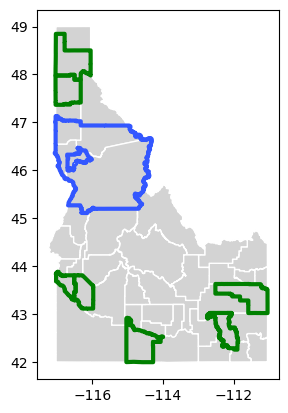

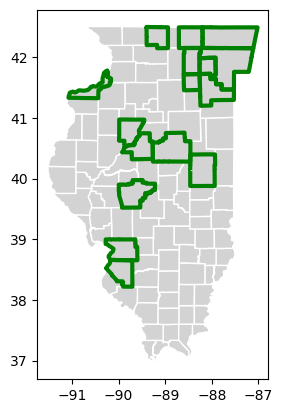

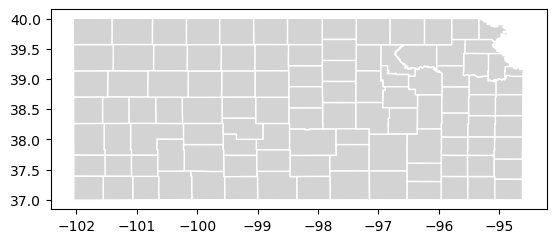

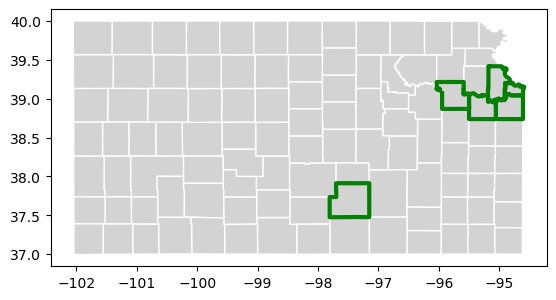

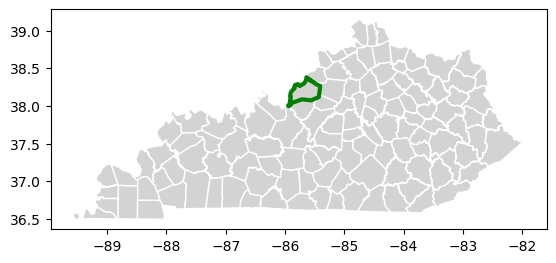

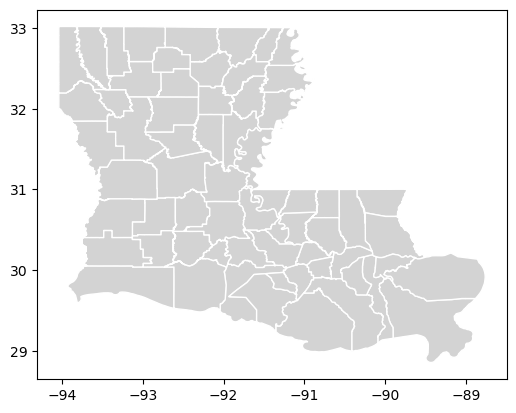

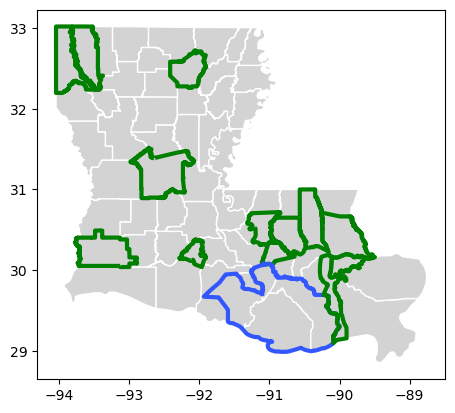

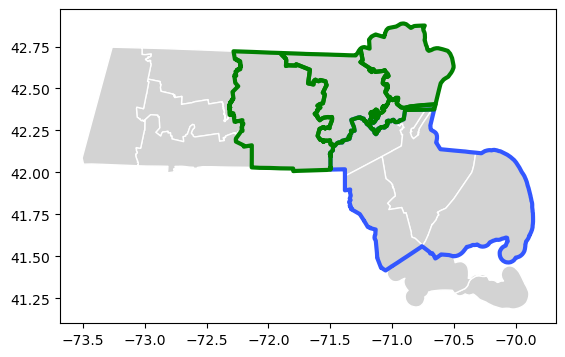

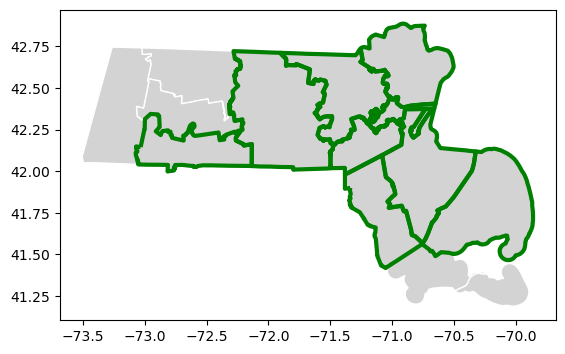

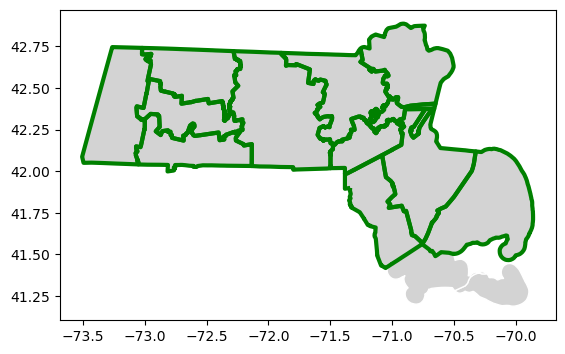

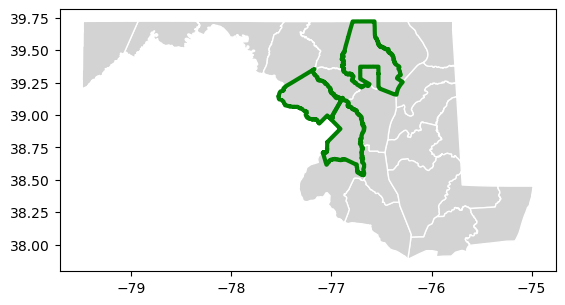

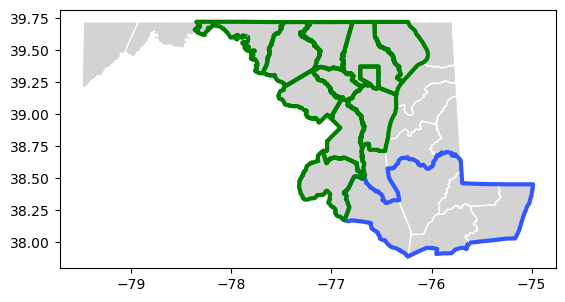

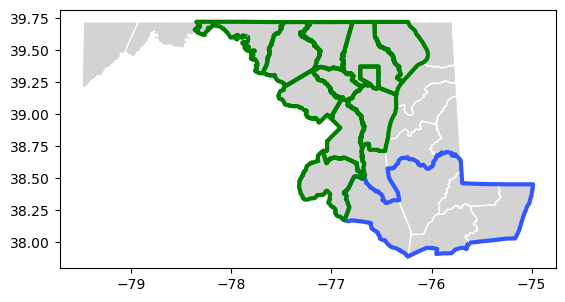

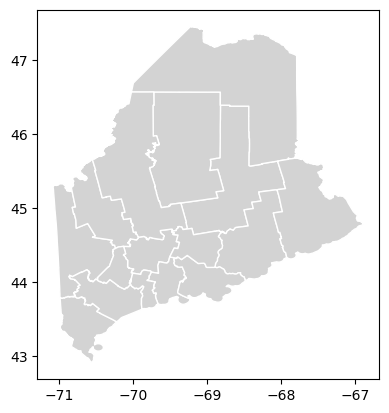

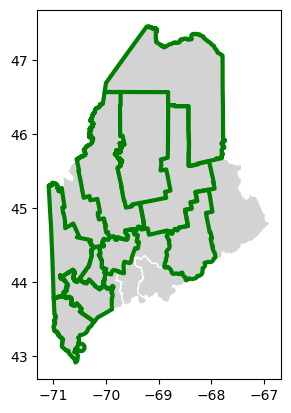

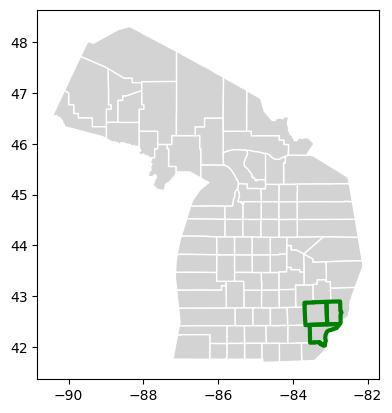

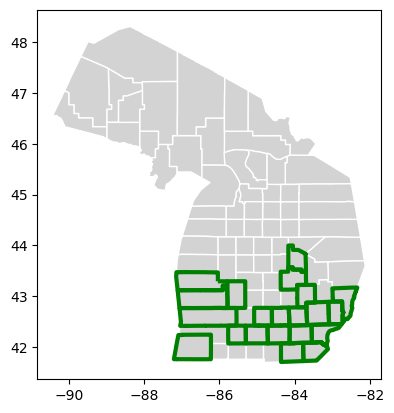

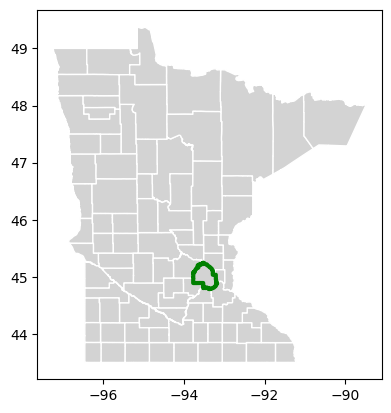

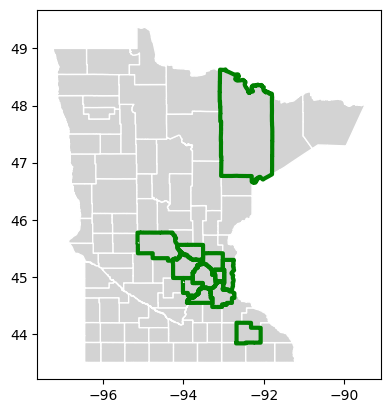

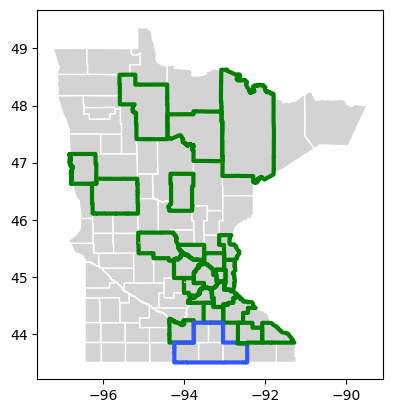

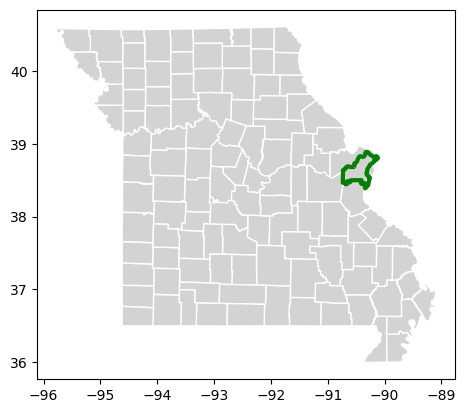

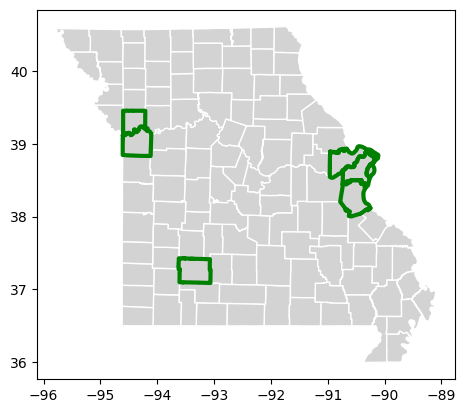

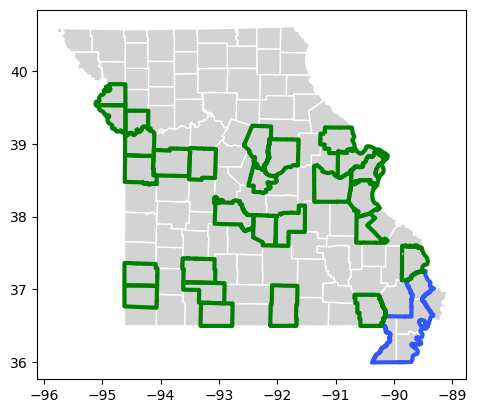

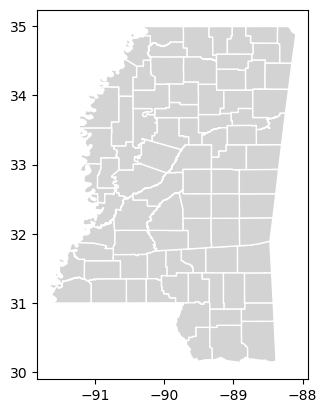

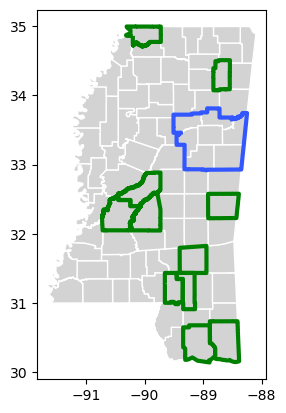

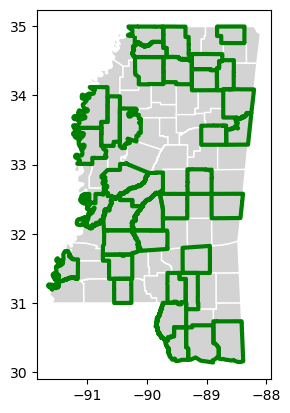

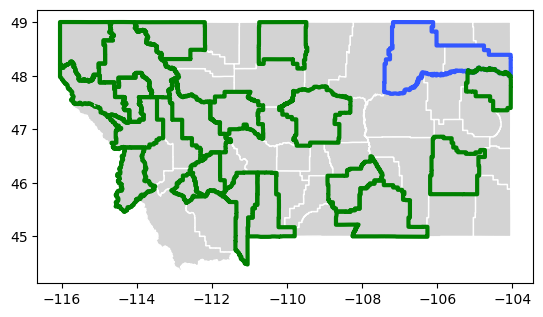

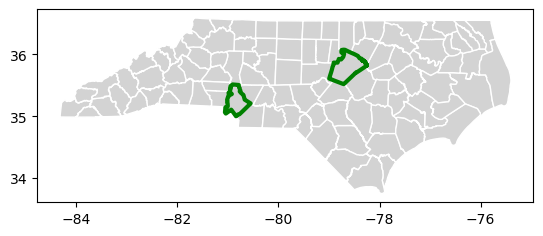

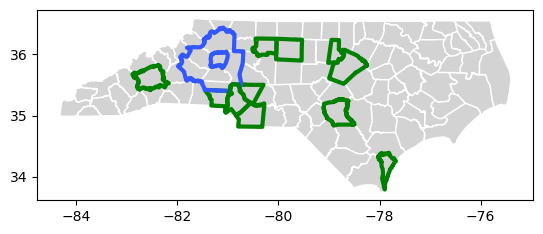

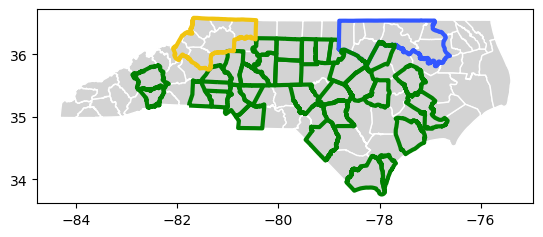

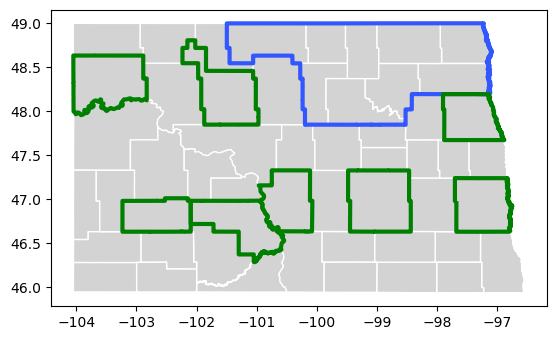

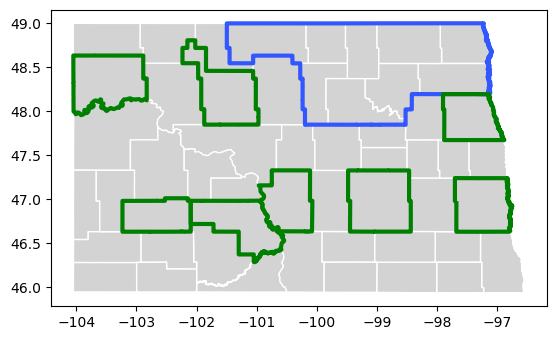

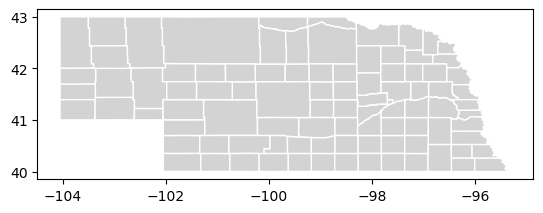

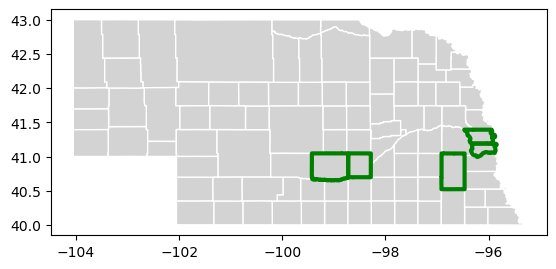

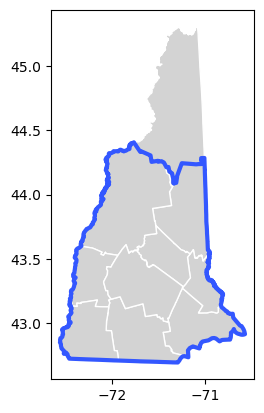

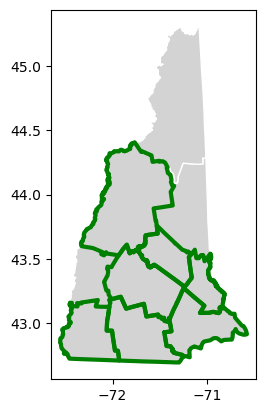

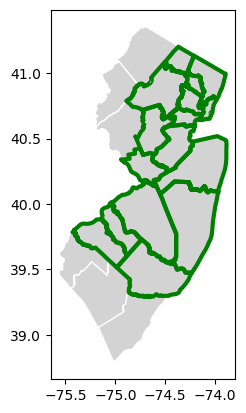

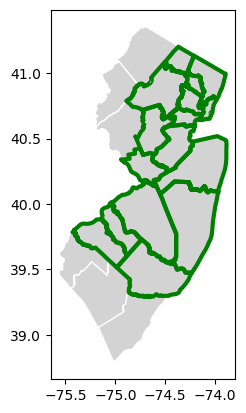

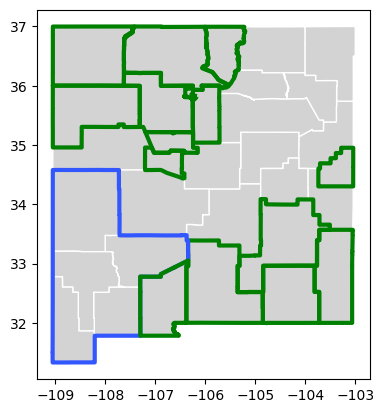

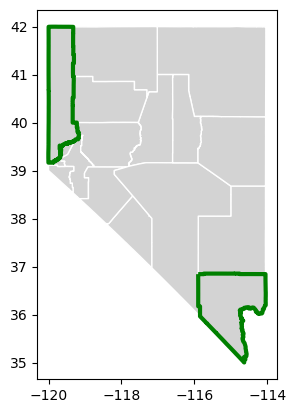

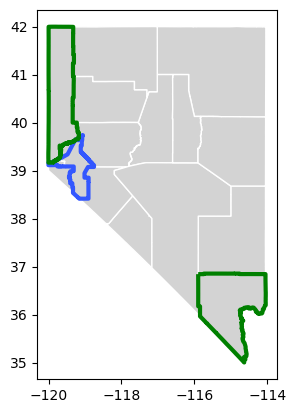

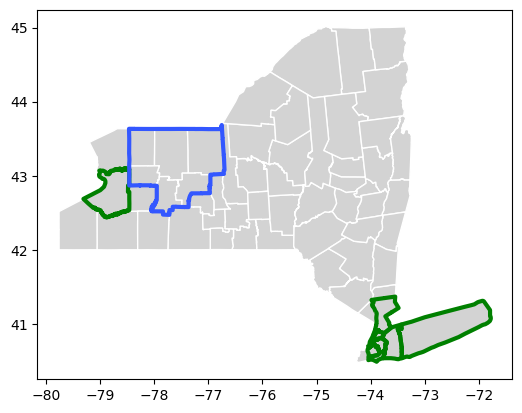

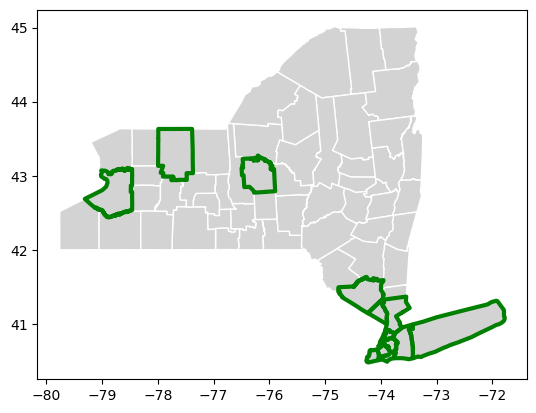

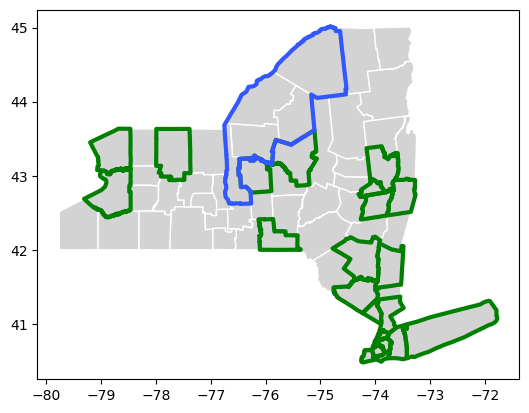

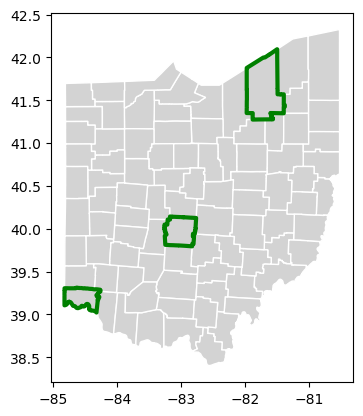

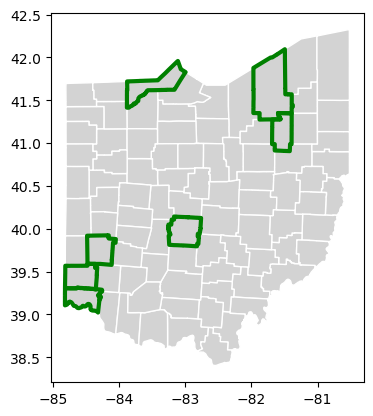

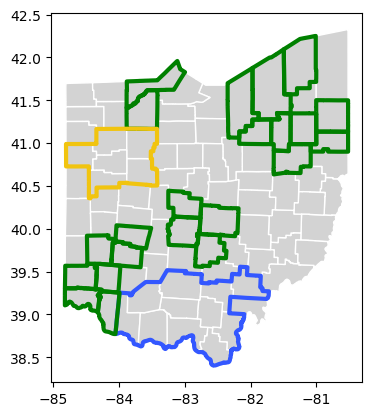

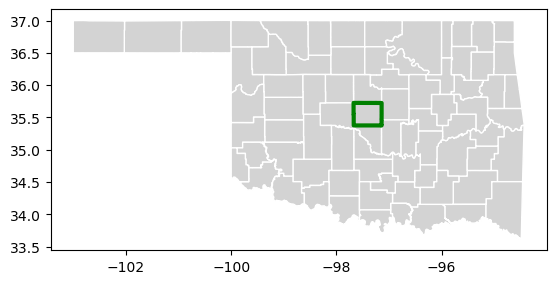

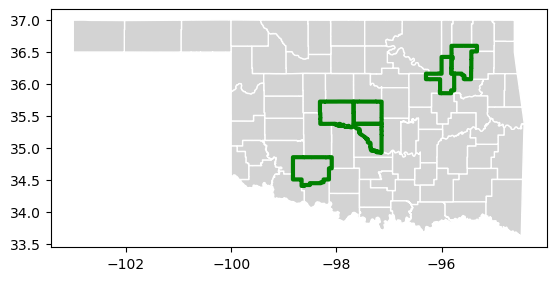

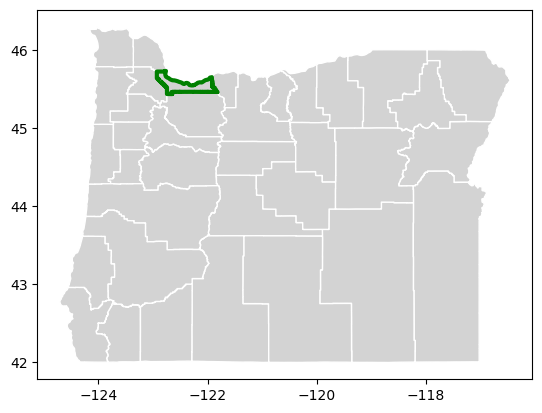

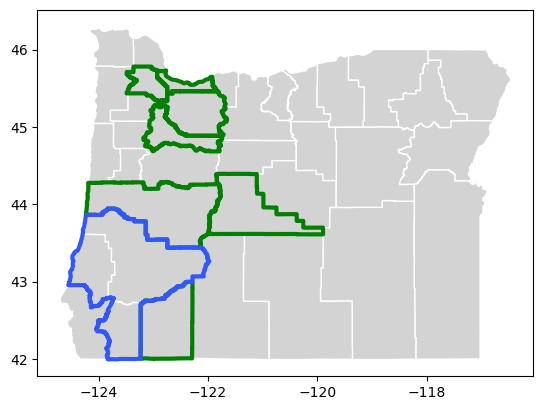

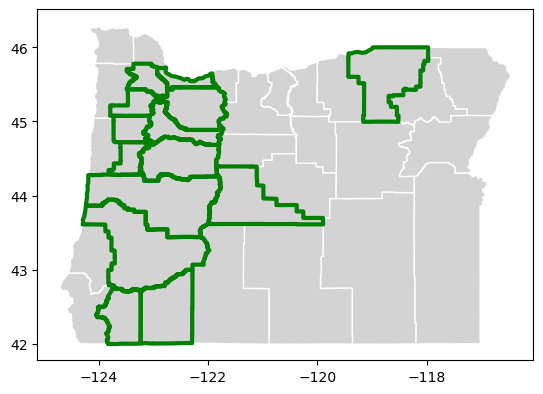

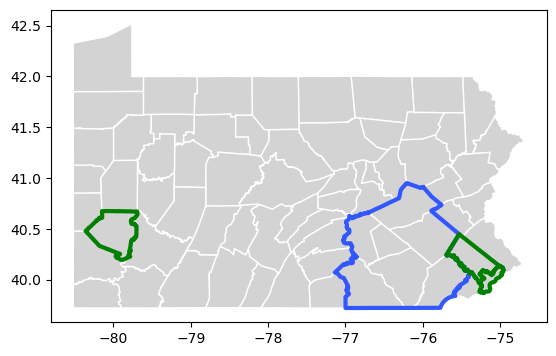

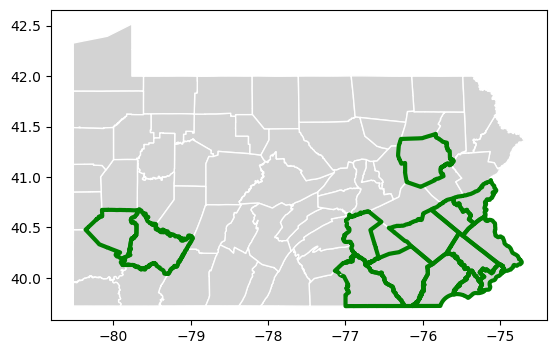

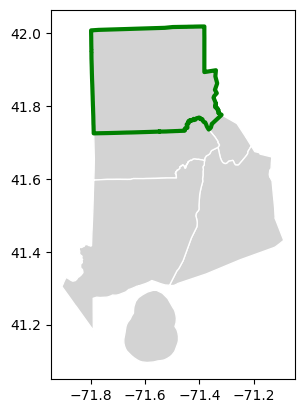

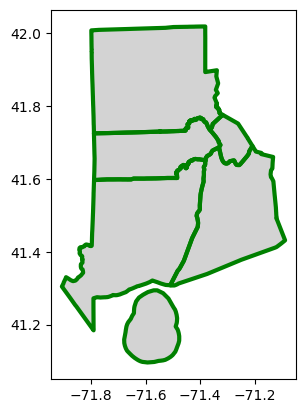

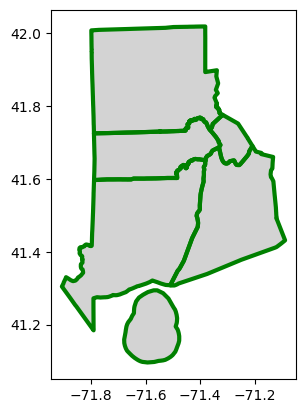

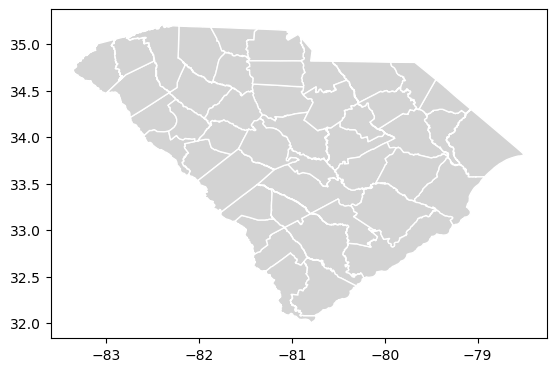

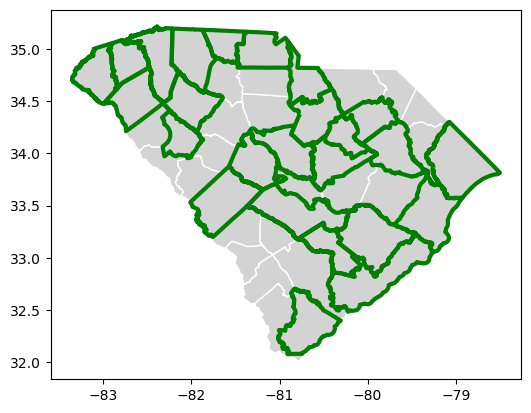

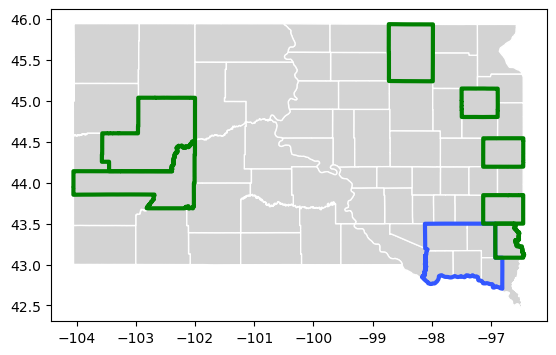

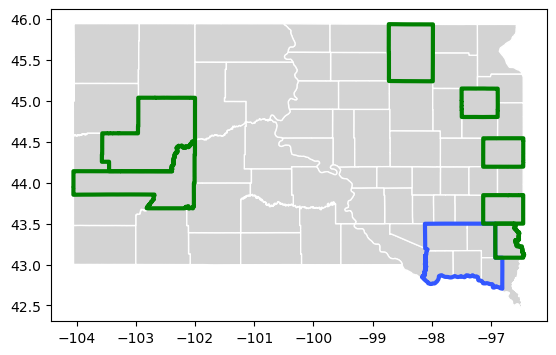

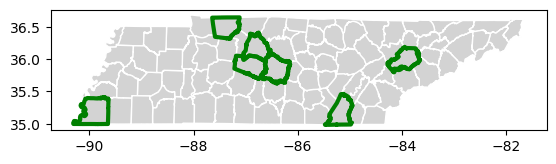

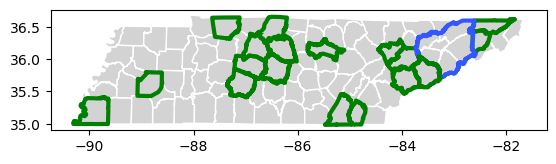

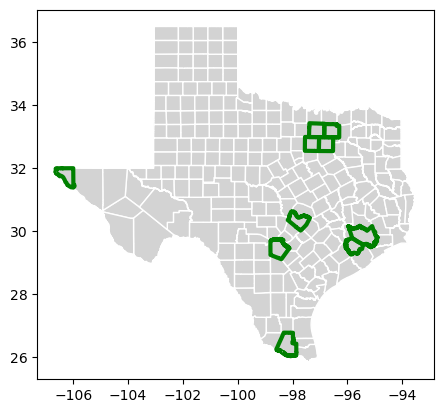

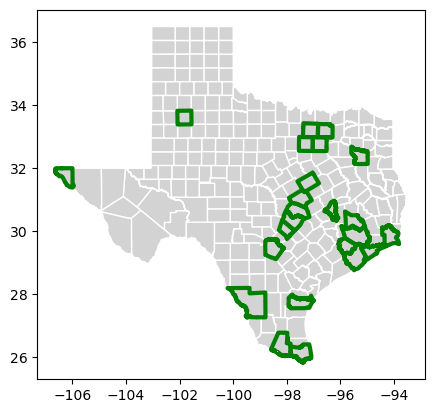

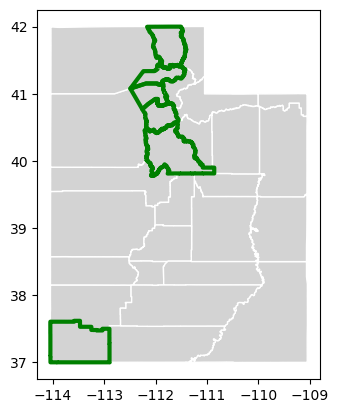

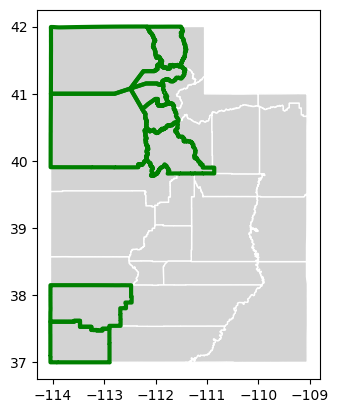

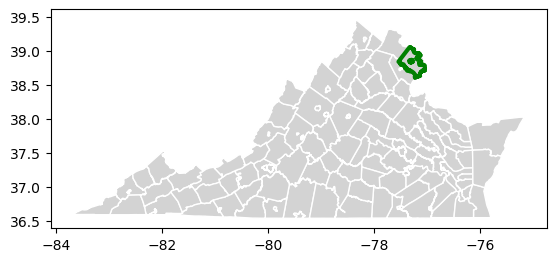

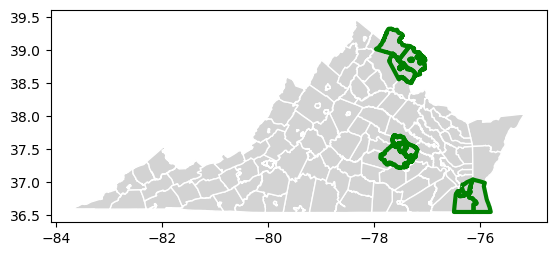

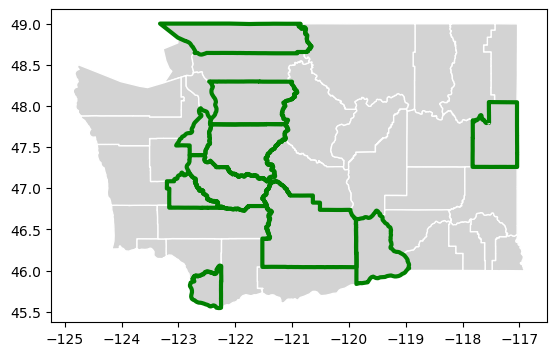

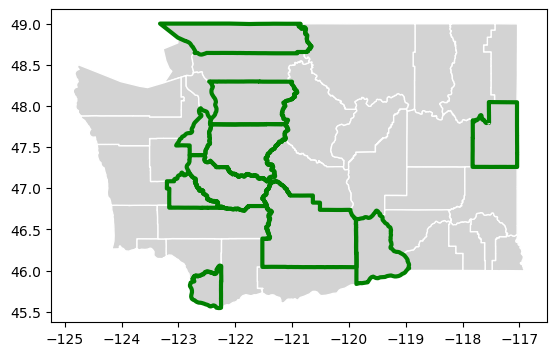

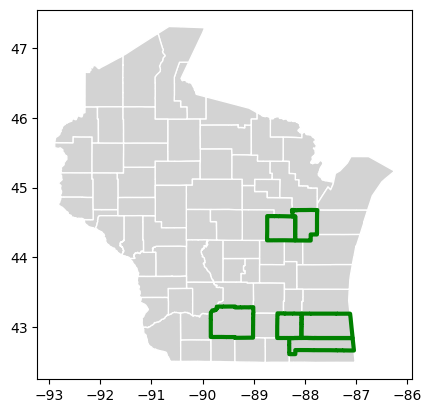

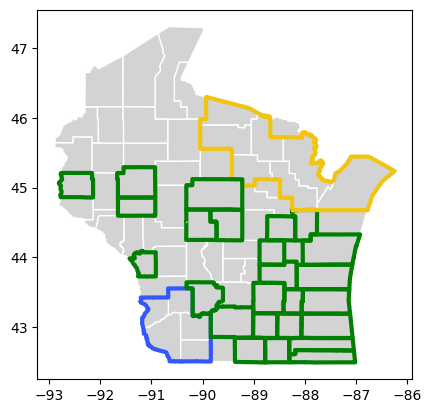

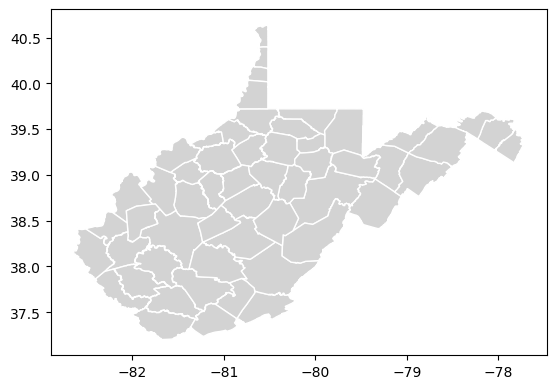

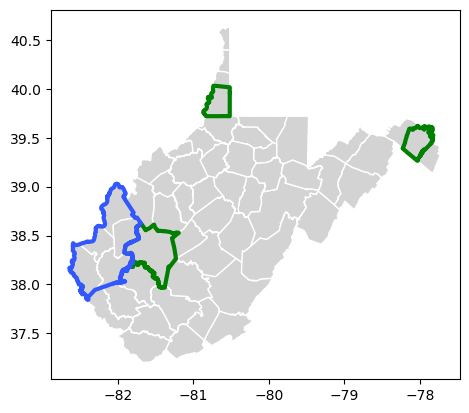

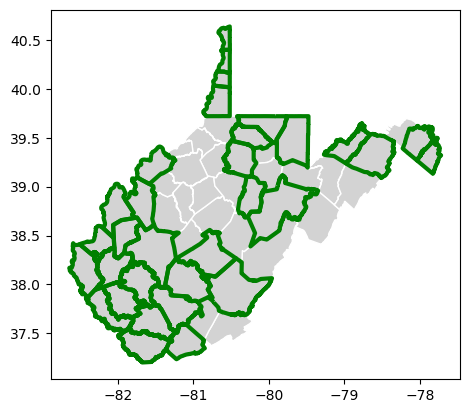

In [8]:
import geopandas as gpd
from shapely.ops import unary_union
import matplotlib.pyplot as plt

for state in states:

    # read graph
    filename = state + '_county.json'
    G = read_graph_from_json( filepath + filename )
    update_attributes(G, state)

    # read geodataframe
    filename = state + '_county.shp'
    gdf = gpd.read_file( filepath + filename )
    
    for district_type in district_types:

        (k, L, U) = get_k_L_U(G, state, district_type)
        if k <= 1:
            print(f"Skipping {state} {district_type} because k = {k}.")
            continue

        ax = gdf.plot(color='lightgrey', edgecolor='white', aspect=1)
        counter = 0

        for I in results[state, district_type]['generalized_articulation_constraints']:
            
            # Filter the counties you're interested in
            selected = gdf[gdf['GEOID20'].isin(I)]
            
            # 1. Dissolve the selected counties into a single polygon
            dissolved = selected.dissolve()
            
            # 2. Get the exterior boundary (this is your Jordan curve)
            border = dissolved.boundary
        
            if len(I) == 1: # singleton
                border.plot(ax=ax, color='green', linewidth=3)
            else:  # larger
                color = color_palette[counter] # 'red'
                border.plot(ax=ax, color=color, linewidth=3)
                counter += 1

        output_name = state + '_' + district_type + '_inequalities.png'
        plt.savefig(output_name, dpi=300)  # You can change dpi for resolution

In [9]:
constraints = dict()
for key in results.keys():
    constraints[key] = results[key]['generalized_articulation_constraints']
    
print("constraints =",constraints)

constraints = {('AK', 'SS'): [{'02090'}, {'02170'}, {'02122'}, {'02020'}], ('AK', 'SH'): [{'02020'}, {'02090'}, {'02170'}, {'02110'}, {'02130', '02198', '02195', '02275'}, {'02122'}], ('AL', 'CD'): [], ('AL', 'SS'): [{'01081'}, {'01089'}, {'01015', '01055', '01009', '01049', '01029', '01019', '01115', '01095', '01121'}, {'01003'}, {'01125'}, {'01097'}, {'01101'}, {'01117'}, {'01073'}], ('AL', 'SH'): [{'01015'}, {'01009'}, {'01071'}, {'01115'}, {'01077'}, {'01043'}, {'01001'}, {'01121'}, {'01031'}, {'01127'}, {'01117'}, {'01095'}, {'01049'}, {'01089'}, {'01055'}, {'01051'}, {'01069'}, {'01101'}, {'01073'}, {'01081'}, {'01113'}, {'01003'}, {'01125'}, {'01097'}, {'01103'}, {'01033'}, {'01083'}], ('AR', 'CD'): [], ('AR', 'SS'): [{'05031'}, {'05007'}, {'05143'}, {'05119'}, {'05125'}, {'05051'}, {'05045'}, {'05131'}], ('AR', 'SH'): [{'05031'}, {'05009'}, {'05059'}, {'05063'}, {'05125'}, {'05139'}, {'05033'}, {'05085'}, {'05005'}, {'05069'}, {'05051'}, {'05035'}, {'05091'}, {'05119'}, {'05055

In [10]:
for key, val in constraints.items():
    print(key, val)

('AK', 'SS') [{'02090'}, {'02170'}, {'02122'}, {'02020'}]
('AK', 'SH') [{'02020'}, {'02090'}, {'02170'}, {'02110'}, {'02130', '02198', '02195', '02275'}, {'02122'}]
('AL', 'CD') []
('AL', 'SS') [{'01081'}, {'01089'}, {'01015', '01055', '01009', '01049', '01029', '01019', '01115', '01095', '01121'}, {'01003'}, {'01125'}, {'01097'}, {'01101'}, {'01117'}, {'01073'}]
('AL', 'SH') [{'01015'}, {'01009'}, {'01071'}, {'01115'}, {'01077'}, {'01043'}, {'01001'}, {'01121'}, {'01031'}, {'01127'}, {'01117'}, {'01095'}, {'01049'}, {'01089'}, {'01055'}, {'01051'}, {'01069'}, {'01101'}, {'01073'}, {'01081'}, {'01113'}, {'01003'}, {'01125'}, {'01097'}, {'01103'}, {'01033'}, {'01083'}]
('AR', 'CD') []
('AR', 'SS') [{'05031'}, {'05007'}, {'05143'}, {'05119'}, {'05125'}, {'05051'}, {'05045'}, {'05131'}]
('AR', 'SH') [{'05031'}, {'05009'}, {'05059'}, {'05063'}, {'05125'}, {'05139'}, {'05033'}, {'05085'}, {'05005'}, {'05069'}, {'05051'}, {'05035'}, {'05091'}, {'05119'}, {'05055'}, {'05115'}, {'05045'}, {'05